# Installations

Movies: (9742, 2)
Ratings: (100836, 5)
Tags: (3683, 5)


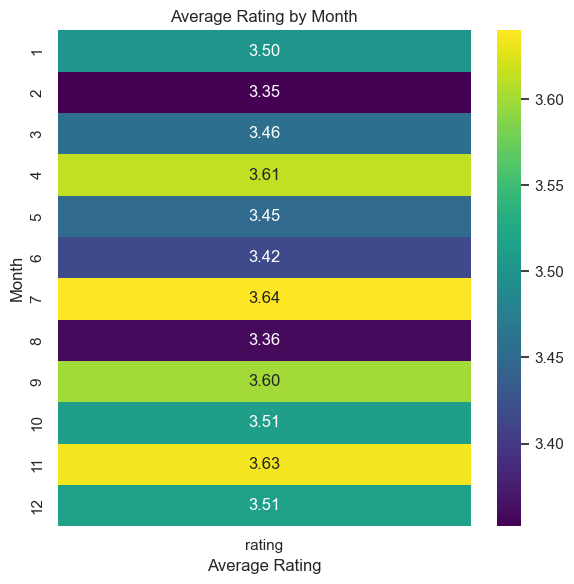

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

plt.rcParams["figure.figsize"] = (10, 6)

DATA_PATH = "data/"

movies = pd.read_csv(DATA_PATH + "movies.csv")
ratings = pd.read_csv(DATA_PATH + "ratings.csv")
tags = pd.read_csv(DATA_PATH + "tags.csv")
genres = pd.read_csv(DATA_PATH + "genre.csv")
movie_genre = pd.read_csv(DATA_PATH + "movie_genre.csv")
links = pd.read_csv(DATA_PATH + "links.csv")

print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Tags:", tags.shape)

ratings["date"] = pd.to_datetime(ratings["date"])
ratings["hour"] = pd.to_datetime(ratings["time"]).dt.hour
ratings["day_of_week"] = ratings["date"].dt.day_name()
ratings["month"] = ratings["date"].dt.month
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

rating_tags = tags.merge(
    ratings[["userId", "movieId", "rating"]],
    on=["userId", "movieId"],
    how="inner"
)

month_rating_pivot = ratings.pivot_table(
    index="month",
    values="rating",
    aggfunc="mean"
)

plt.figure(figsize=(6, 6))

sns.heatmap(
    month_rating_pivot,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar=True
)

plt.title("Average Rating by Month")
plt.xlabel("Average Rating")
plt.ylabel("Month")

plt.tight_layout()
plt.show()


In [165]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [166]:
import pandas as pd
import numpy as np
print(f"pd version:{pd.__version__}")
print(f"np version:{np.__version__}")

pd version:3.0.0
np version:2.4.2


# Load and display files

In [167]:

#load the files
movies_file = pd.read_csv("data/movies.csv")
links_file = pd.read_csv("data/links.csv")
ratings_file = pd.read_csv("data/ratings.csv")
tags_file = pd.read_csv("data/tags.csv")

#print first 5 rows
movies_file.head()
links_file.head()
ratings_file.head()
tags_file.head()

,userId,movieId,tag,date,time
0,2,60756,funny,2015-10-24,19:29:54
1,2,60756,Highly quotable,2015-10-24,19:29:56
2,2,60756,will ferrell,2015-10-24,19:29:52
3,2,89774,Boxing story,2015-10-24,19:33:27
4,2,89774,MMA,2015-10-24,19:33:20


# Restructure Dataset


### genre csv

In [168]:
genres_col = movies_file["genres"].str.split("|").explode().unique()
genre_data = {
    "genreId":range(len(genres_col)),
    "genre": genres_col
}
genre_df = pd.DataFrame(data=genre_data)
genre_file = genre_df.to_csv("data/genre.csv", index=False)


KeyError: 'genres'

### movie_genres csv

In [ ]:
movie_genres = (
    movies_file[["movieId", "genres"]]
    .assign(genre = movies_file["genres"].str.split("|"))
    .explode("genre")
)

movie_genre_df = movie_genres.merge(
    genre_df,
    left_on="genre",
    right_on="genre",
    how="left"
)

# ✅ Keep the three columns you want (using the *actual* column names)
movie_genre_df = movie_genre_df[["movieId", "genreId", "genre"]]

# (Optional) — only if you want lowercase movieid in the final file
movie_genre_df.rename(columns={"movieId": "movieid"}, inplace=True)

movie_genres_file = movie_genre_df.to_csv("data/movie_genre.csv", index=False)


### drop cols

In [ ]:
movies_file = movies_file.drop(columns=["genres"])
movies_file.head()

### change data types

In [ ]:
genre_files = pd.read_csv("data/genre.csv")
movie_genre_files = pd.read_csv("data/movie_genre.csv")

links_file["tmdbId"] = links_file["tmdbId"].astype("Int64")
ratings_file["timestamp"] = pd.to_datetime(ratings_file["timestamp"], unit="s")
tags_file["timestamp"] = pd.to_datetime(tags_file["timestamp"], unit="s")

 

### split timestamp into date and time


In [ ]:
ratings_file["date"] = ratings_file["timestamp"].dt.date
ratings_file["time"] = ratings_file["timestamp"].dt.time

tags_file["date"] = tags_file["timestamp"].dt.date
tags_file["time"] = tags_file["timestamp"].dt.time

tags_file = tags_file.drop(columns=["timestamp"])
ratings_file = ratings_file.drop(columns=["timestamp"])


### remove nulls

In [ ]:
links_file = links_file.dropna()
links_file.isna().sum()


### remove duplicates

In [ ]:
links_file.drop_duplicates(inplace=True)
links_file.duplicated().sum()

### save files


In [ ]:
tags_file.to_csv("data/tags.csv", index=False)
ratings_file.to_csv("data/ratings.csv", index=False)
movies_file.to_csv("data/movies.csv", index=False)
links_file.to_csv("data/links.csv", index=False)